# Desafio de Inferência sobre depressão

## Objetivos:

### 1) Qual o perfil de indivíduos (adultos maiores de 18 anos) com sintomas depressivos nos EUA no período de 2005-2006?

### 2) Hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão nesta população?

In [1]:
# Importar as bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Removendo warnings
import warnings
warnings.filterwarnings('ignore')
# Aumentando a quantidade de linhas e colunas que podem ser vistas
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999 
# Carregando os dados
phq = pd.read_csv('DEMO_PHQ.csv', sep = ',', encoding='UTF-8',
             header = 0, index_col=0)
pag_hei = pd.read_csv('PAG_HEI.csv', sep = ',', encoding='UTF-8',
             header = 0, index_col=0)

# Pré-tratamento do dataset DEMO_PHQ

In [2]:
# Visão geral do banco de dados DEMO_PHQ
phq

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
SEQN,,,,,,,,,,,,,,
31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0
41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0
41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0


In [3]:
# Olhando as 10 primeiras linhas da base de dados Patient Health Questionnaire
phq.head(10)

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
SEQN,,,,,,,,,,,,,,
31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0
31144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,21,2,3,3.0
31149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,85,3,2,1.0
31150,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,79,3,3,3.0


In [4]:
# Entendendo a tipagem dos dados e reconhecendo valores nulos
phq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 31130 to 41473
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DPQ010    4836 non-null   float64
 1   DPQ020    4836 non-null   float64
 2   DPQ030    4836 non-null   float64
 3   DPQ040    4836 non-null   float64
 4   DPQ050    4836 non-null   float64
 5   DPQ060    4836 non-null   float64
 6   DPQ070    4836 non-null   float64
 7   DPQ080    4836 non-null   float64
 8   DPQ090    4836 non-null   float64
 9   RIAGENDR  5334 non-null   int64  
 10  RIDAGEYR  5334 non-null   int64  
 11  RIDRETH1  5334 non-null   int64  
 12  DMDEDUC   5334 non-null   int64  
 13  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 625.1 KB


In [5]:
# Observar sumário estatístico dos valores de cada coluna
phq.describe()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
count,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,5334.000000,5334.000000,5334.000000,5334.000000,5287.000000
mean,0.307279,0.313069,0.551282,0.717328,0.320720,0.209884,0.230356,0.147849,0.050248,1.519873,45.089989,2.871016,3.233221,8.738604
std,0.758459,0.710683,0.931166,0.913711,0.743057,0.624552,0.639186,0.590390,0.326933,0.499652,20.145853,1.128468,1.268395,12.777756
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,27.000000,3.000000,2.000000,4.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,43.000000,3.000000,3.000000,7.000000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,62.000000,4.000000,4.000000,10.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000,85.000000,5.000000,9.000000,99.000000


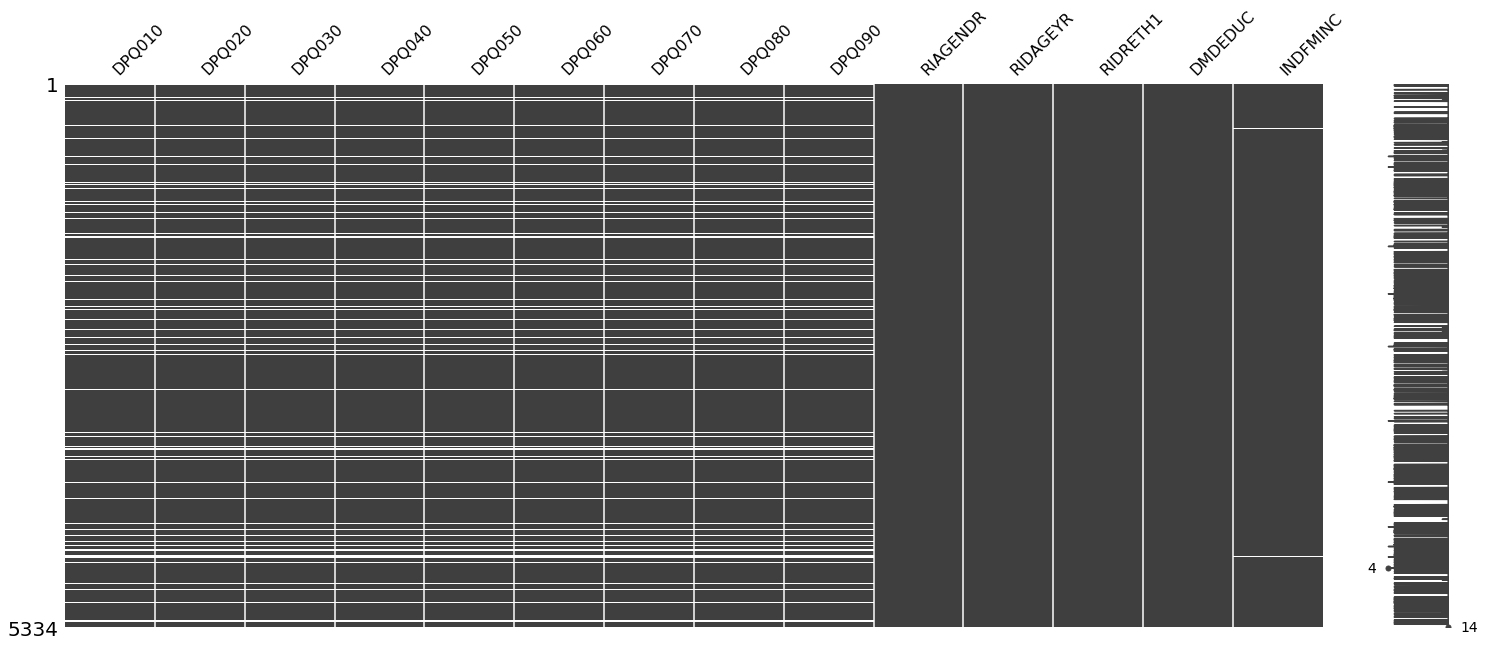

In [6]:
# Analisar o posicionamento de cada missing nas variáveis
import missingno as msno
msno.matrix(phq)
plt.show()

In [7]:
# Calculando a média de missings de cada coluna em relação a ela mesma, observa-se que cerca de 9,33% não possui dado.
phq.isna().mean(axis=0)*100

DPQ010      9.336333
DPQ020      9.336333
DPQ030      9.336333
DPQ040      9.336333
DPQ050      9.336333
DPQ060      9.336333
DPQ070      9.336333
DPQ080      9.336333
DPQ090      9.336333
RIAGENDR    0.000000
RIDAGEYR    0.000000
RIDRETH1    0.000000
DMDEDUC     0.000000
INDFMINC    0.881140
dtype: float64

In [8]:
# Decidiu-se preencher os dados faltantes com o valor 9 - preferência por não responder, 
# uma vez que imputar a moda poderia enviesar a análise. Assim, criei uma cópia do dataset origal e preenchi os faltantes.
# (Para a variável renda, o valor imputado para preenchimento foi 77.0 que tem o mesmo significado que 9.0 para as outras
# colunas.)
# Vale ressaltar que poderia se pensar em um loop para preencher as colunas, tornando o código menor
phq_fill = phq.copy()
phq_fill['DPQ010'] = phq_fill['DPQ010'].fillna(9.0, inplace=False)
phq_fill['DPQ020'] = phq_fill['DPQ020'].fillna(9.0, inplace=False)
phq_fill['DPQ030'] = phq_fill['DPQ030'].fillna(9.0, inplace=False)
phq_fill['DPQ040'] = phq_fill['DPQ040'].fillna(9.0, inplace=False)
phq_fill['DPQ050'] = phq_fill['DPQ050'].fillna(9.0, inplace=False)
phq_fill['DPQ060'] = phq_fill['DPQ060'].fillna(9.0, inplace=False)
phq_fill['DPQ070'] = phq_fill['DPQ070'].fillna(9.0, inplace=False)
phq_fill['DPQ080'] = phq_fill['DPQ080'].fillna(9.0, inplace=False)
phq_fill['DPQ090'] = phq_fill['DPQ090'].fillna(9.0, inplace=False)
phq_fill['INDFMINC'] = phq_fill['INDFMINC'].fillna(77.0, inplace=False)
phq_fill.isnull().sum()

DPQ010      0
DPQ020      0
DPQ030      0
DPQ040      0
DPQ050      0
DPQ060      0
DPQ070      0
DPQ080      0
DPQ090      0
RIAGENDR    0
RIDAGEYR    0
RIDRETH1    0
DMDEDUC     0
INDFMINC    0
dtype: int64

In [9]:
# 
phq_fill

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
SEQN,,,,,,,,,,,,,,
31130,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,2,85,3,4,4.0
31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0
41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0
41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0


# Pré-tratamento do dataset PAG_HEI

In [10]:
pag_hei

,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
SEQN,,,,,,,,,,,,,,,,
31128,NaN,NaN,3.083350,0.000000,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
31129,285.450346,2.0,1.697761,0.000000,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31131,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
31132,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41469,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323
41471,951.478060,3.0,2.674192,3.769401,2.198817,0.517369,0.463168,4.662005,5.000000,1.191796,6.145146,3.189620,3.766149,3.974279,7.758940,45.310883
41472,27.713626,1.0,2.457422,2.930799,2.311917,0.000000,0.933303,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467


In [11]:
# Visualizar as 5 primeiras linhas do banco
pag_hei.head()


,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
SEQN,,,,,,,,,,,,,,,,
31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


In [12]:
# Tipagem dos dados e valores nulos
pag_hei.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9424 entries, 31128 to 41474
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PAG_MINW                  7150 non-null   float64
 1   ADHERENCE                 7150 non-null   float64
 2   HEI2015C1_TOTALVEG        8549 non-null   float64
 3   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 4   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 5   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 6   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 7   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 8   HEI2015C7_TOTPROT         8549 non-null   float64
 9   HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 10  HEI2015C9_FATTYACID       8549 non-null   float64
 11  HEI2015C10_SODIUM         8549 non-null   float64
 12  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 13  HEI2015C12_SFAT           8549 non-null   float64
 14  HEI

In [13]:
# Identificando a média percentual dos missings
pag_hei.isna().mean(axis=0)*100

PAG_MINW                    24.129881
ADHERENCE                   24.129881
HEI2015C1_TOTALVEG           9.284805
HEI2015C2_GREEN_AND_BEAN     9.284805
HEI2015C3_TOTALFRUIT         9.284805
HEI2015C4_WHOLEFRUIT         9.284805
HEI2015C5_WHOLEGRAIN         9.284805
HEI2015C6_TOTALDAIRY         9.284805
HEI2015C7_TOTPROT            9.284805
HEI2015C8_SEAPLANT_PROT      9.284805
HEI2015C9_FATTYACID          9.284805
HEI2015C10_SODIUM            9.284805
HEI2015C11_REFINEDGRAIN      9.284805
HEI2015C12_SFAT              9.284805
HEI2015C13_ADDSUG            9.284805
HEI2015_TOTAL_SCORE          9.284805
dtype: float64

In [14]:
# Observando os valores faltantes em termos absolutos
pag_hei.isnull().sum()

PAG_MINW                    2274
ADHERENCE                   2274
HEI2015C1_TOTALVEG           875
HEI2015C2_GREEN_AND_BEAN     875
HEI2015C3_TOTALFRUIT         875
HEI2015C4_WHOLEFRUIT         875
HEI2015C5_WHOLEGRAIN         875
HEI2015C6_TOTALDAIRY         875
HEI2015C7_TOTPROT            875
HEI2015C8_SEAPLANT_PROT      875
HEI2015C9_FATTYACID          875
HEI2015C10_SODIUM            875
HEI2015C11_REFINEDGRAIN      875
HEI2015C12_SFAT              875
HEI2015C13_ADDSUG            875
HEI2015_TOTAL_SCORE          875
dtype: int64

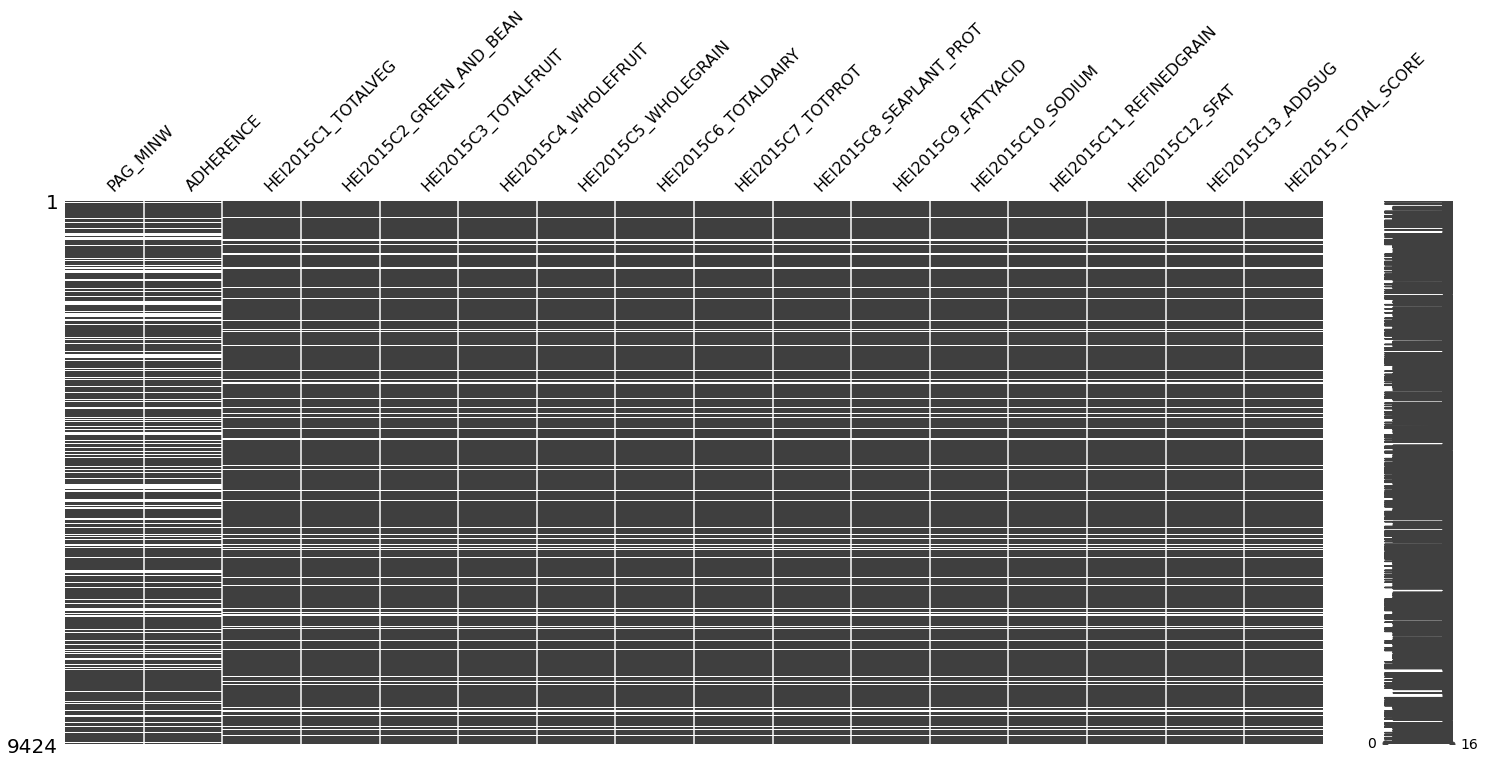

In [15]:
# Identificando as diferentes posições dos missings em cada variável quantitativa
msno.matrix(pag_hei)
plt.show()

### Decidi fazer a limpeza dos dados faltantes após unir os bancos de dados devido ao fato do PAG_HEI conter variáveis quantitativas 

# Concatenar os dois bancos de dados, usando como chave única a variável
# SEQN


In [16]:
# Concatenando os bancos usando merge
SEQN = pd.merge(phq_fill, pag_hei,how='inner', on='SEQN' )
SEQN

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31130,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,2,85,3,4,4.0,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0,9.237875,1.0,2.885575,1.260753,5.000000,5.000000,4.607930,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915
41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0,173.210162,2.0,5.000000,2.851503,5.000000,5.000000,3.041603,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869
41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323


In [17]:
# Criação da variável PHQ9 como sendo um escore dos valores DPQ010 a DPQ090
SEQN['PHQ9'] = SEQN['DPQ010'] + SEQN['DPQ020'] + SEQN['DPQ030'] + SEQN['DPQ040'] + SEQN['DPQ050'] + SEQN['DPQ060']+ SEQN['DPQ070'] + SEQN['DPQ080'] + SEQN['DPQ090']
SEQN['PHQ9']

SEQN
31130    81.0
31131     0.0
31132     0.0
31134     0.0
31139     4.0
         ... 
41466     2.0
41468    10.0
41469     2.0
41472     0.0
41473     4.0
Name: PHQ9, Length: 5334, dtype: float64

# Seguindo o script proposto pela Tera, criou-se uma nova variável PQH_GR que vai assumir valores condicionais, 
## baseando-se na variável PHQ9 anteriormente criada. A nova variável irá assumir: 
## 0 (“sem sintomas”) se phq9 < 5,
## 1 (“sintomas leves”) se 5 <= phq9 < 10, 
## 2 (“sintomas moderados”) se 10 <= phq9 < 15, 
## 3 (“sintomas moderadamente severos”) se 15 <= phq9 < 19 e 
## 4 (“sintomas severos”) se phq9 >= 20
## Para tanto, foi usado o método np.select

In [31]:
# Criação da lista de condições dos valores com o nome condict
condict = [
    (SEQN['PHQ9'] < 5),
    (SEQN['PHQ9'] >= 5) & (SEQN['PHQ9'] < 10),
    (SEQN['PHQ9'] >= 10) & (SEQN['PHQ9'] < 15),
    (SEQN['PHQ9'] >= 15) & (SEQN['PHQ9'] < 20),
    (SEQN['PHQ9'] >= 20)
]
# Criação de uma nova lista com os respectivos valores de cada grupo:
valores = [0,1,2,3,4]
# Criando a nova coluna com o np.select
SEQN['PHQ_GRP'] = np.select(condict, valores)
SEQN['PHQ_GRP']

SEQN
31130    4
31131    0
31132    0
31134    0
31139    0
        ..
41466    0
41468    2
41469    0
41472    0
41473    0
Name: PHQ_GRP, Length: 5334, dtype: int32

In [34]:
# Verificando se as colunas foram adicionadas
for column in SEQN:
    print(column)

DPQ010
DPQ020
DPQ030
DPQ040
DPQ050
DPQ060
DPQ070
DPQ080
DPQ090
RIAGENDR
RIDAGEYR
RIDRETH1
DMDEDUC
INDFMINC
PAG_MINW
ADHERENCE
HEI2015C1_TOTALVEG
HEI2015C2_GREEN_AND_BEAN
HEI2015C3_TOTALFRUIT
HEI2015C4_WHOLEFRUIT
HEI2015C5_WHOLEGRAIN
HEI2015C6_TOTALDAIRY
HEI2015C7_TOTPROT
HEI2015C8_SEAPLANT_PROT
HEI2015C9_FATTYACID
HEI2015C10_SODIUM
HEI2015C11_REFINEDGRAIN
HEI2015C12_SFAT
HEI2015C13_ADDSUG
HEI2015_TOTAL_SCORE
PHQ9
PHQ_GRP


# Análise Univariada

In [35]:
# Analisando a tipagem dos dados e dados faltantes
SEQN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 31130 to 41473
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DPQ010                    5334 non-null   float64
 1   DPQ020                    5334 non-null   float64
 2   DPQ030                    5334 non-null   float64
 3   DPQ040                    5334 non-null   float64
 4   DPQ050                    5334 non-null   float64
 5   DPQ060                    5334 non-null   float64
 6   DPQ070                    5334 non-null   float64
 7   DPQ080                    5334 non-null   float64
 8   DPQ090                    5334 non-null   float64
 9   RIAGENDR                  5334 non-null   int64  
 10  RIDAGEYR                  5334 non-null   int64  
 11  RIDRETH1                  5334 non-null   int64  
 12  DMDEDUC                   5334 non-null   int64  
 13  INDFMINC                  5334 non-null   float64
 14  PAG

In [36]:
# Para discernir os missings, foi usada a média dos faltantes por coluna. Assim, é possível concluir que esses dados
# representam cerca de 5.13% da base 
SEQN.isna().mean(axis=0)*100 # Multiplicar por 100 transforma em percentual

DPQ010                      0.000000
DPQ020                      0.000000
DPQ030                      0.000000
DPQ040                      0.000000
DPQ050                      0.000000
DPQ060                      0.000000
DPQ070                      0.000000
DPQ080                      0.000000
DPQ090                      0.000000
RIAGENDR                    0.000000
RIDAGEYR                    0.000000
RIDRETH1                    0.000000
DMDEDUC                     0.000000
INDFMINC                    0.000000
PAG_MINW                    0.000000
ADHERENCE                   0.000000
HEI2015C1_TOTALVEG          5.136858
HEI2015C2_GREEN_AND_BEAN    5.136858
HEI2015C3_TOTALFRUIT        5.136858
HEI2015C4_WHOLEFRUIT        5.136858
HEI2015C5_WHOLEGRAIN        5.136858
HEI2015C6_TOTALDAIRY        5.136858
HEI2015C7_TOTPROT           5.136858
HEI2015C8_SEAPLANT_PROT     5.136858
HEI2015C9_FATTYACID         5.136858
HEI2015C10_SODIUM           5.136858
HEI2015C11_REFINEDGRAIN     5.136858
H

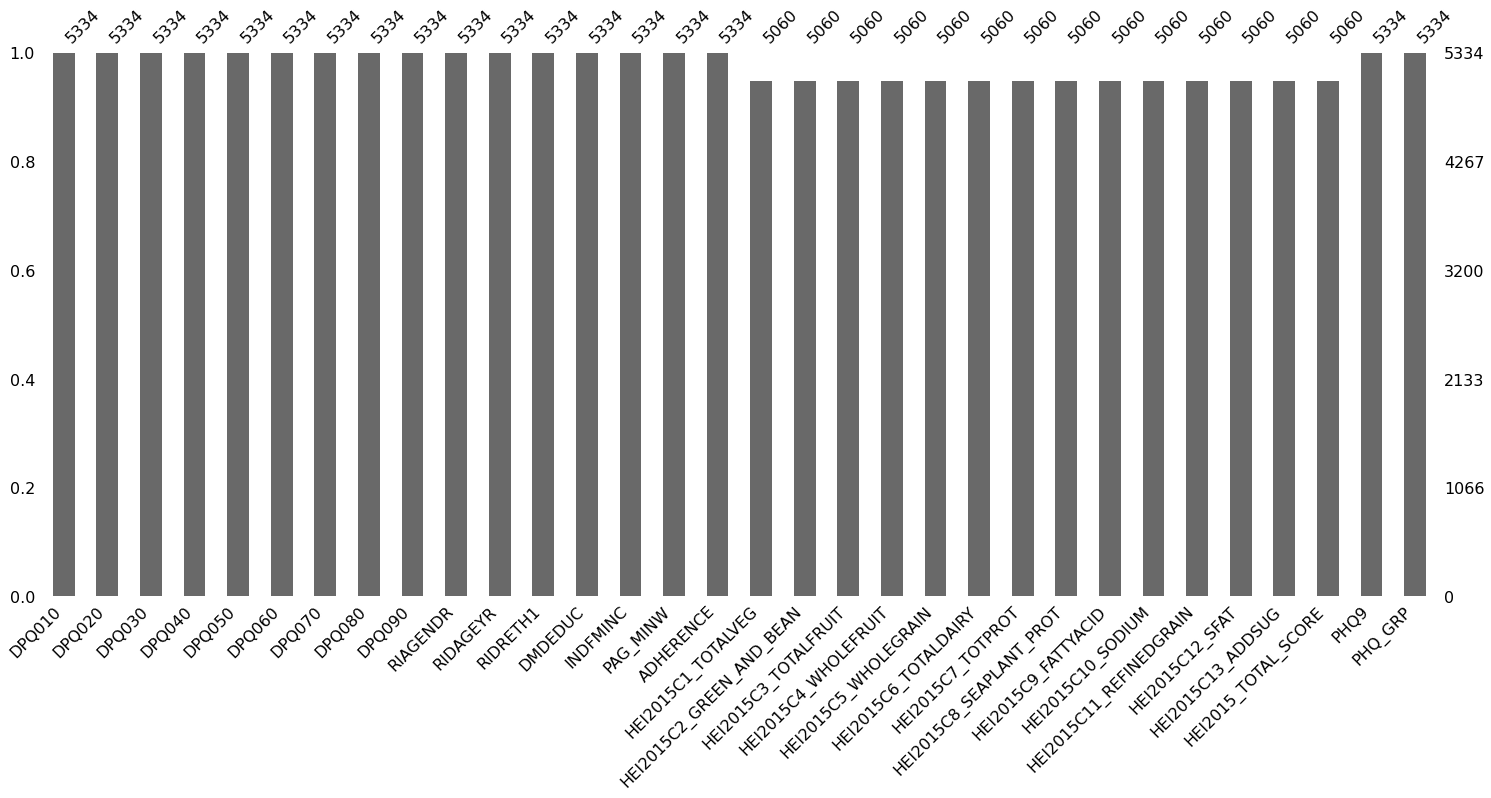

In [38]:
# Para a tomada de decisão, além da análise da média dos dados faltantes, foi usada a visualização do quão preenchido cada
# coluna estava, usando o missingno (!pip install missingno).
msno.bar((SEQN))
plt.show()

In [39]:
# Outro método simples para ver em termos absolutos os missings é o 'isna'
SEQN.isna().sum()

DPQ010                        0
DPQ020                        0
DPQ030                        0
DPQ040                        0
DPQ050                        0
DPQ060                        0
DPQ070                        0
DPQ080                        0
DPQ090                        0
RIAGENDR                      0
RIDAGEYR                      0
RIDRETH1                      0
DMDEDUC                       0
INDFMINC                      0
PAG_MINW                      0
ADHERENCE                     0
HEI2015C1_TOTALVEG          274
HEI2015C2_GREEN_AND_BEAN    274
HEI2015C3_TOTALFRUIT        274
HEI2015C4_WHOLEFRUIT        274
HEI2015C5_WHOLEGRAIN        274
HEI2015C6_TOTALDAIRY        274
HEI2015C7_TOTPROT           274
HEI2015C8_SEAPLANT_PROT     274
HEI2015C9_FATTYACID         274
HEI2015C10_SODIUM           274
HEI2015C11_REFINEDGRAIN     274
HEI2015C12_SFAT             274
HEI2015C13_ADDSUG           274
HEI2015_TOTAL_SCORE         274
PHQ9                          0
PHQ_GRP 

In [41]:
# Assim, optou-se por excluir tais registros, pois representam baixa proporção da base.
# Excluir esses itens
SEQN_A1 = SEQN.dropna(axis = 0, how = "any")
SEQN_A1.isnull().sum()

DPQ010                      0
DPQ020                      0
DPQ030                      0
DPQ040                      0
DPQ050                      0
DPQ060                      0
DPQ070                      0
DPQ080                      0
DPQ090                      0
RIAGENDR                    0
RIDAGEYR                    0
RIDRETH1                    0
DMDEDUC                     0
INDFMINC                    0
PAG_MINW                    0
ADHERENCE                   0
HEI2015C1_TOTALVEG          0
HEI2015C2_GREEN_AND_BEAN    0
HEI2015C3_TOTALFRUIT        0
HEI2015C4_WHOLEFRUIT        0
HEI2015C5_WHOLEGRAIN        0
HEI2015C6_TOTALDAIRY        0
HEI2015C7_TOTPROT           0
HEI2015C8_SEAPLANT_PROT     0
HEI2015C9_FATTYACID         0
HEI2015C10_SODIUM           0
HEI2015C11_REFINEDGRAIN     0
HEI2015C12_SFAT             0
HEI2015C13_ADDSUG           0
HEI2015_TOTAL_SCORE         0
PHQ9                        0
PHQ_GRP                     0
dtype: int64